## Préambule : les données


In [1]:
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

2024-11-15 21:05:42.761238: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 21:05:42.774438: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-15 21:05:42.805613: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731701142.848483 2370098 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731701142.860308 2370098 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Partie 1 - Analyse des données

* Compter le nombre de classes et le nombre d'images par classe.

In [2]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

# Charger les données
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Compter le nombre de classes et le nombre d'images par classe
unique_classes, counts = np.unique(trainy, return_counts=True)
class_count_df = pd.DataFrame({'Classe': unique_classes, 'Nombre d\'images': counts})

# Afficher le résultat
print(class_count_df)


   Classe  Nombre d'images
0       0             6000
1       1             6000
2       2             6000
3       3             6000
4       4             6000
5       5             6000
6       6             6000
7       7             6000
8       8             6000
9       9             6000


* Importer les images (avec leur classe), on pourra au choix garder des tableaux 28x28 ou 784 (x1).


In [5]:
# Les images restent sous forme de tableaux 28x28
trainX_28x28 = trainX[:1000]  # On prend un sous-ensemble de 1000 pour simplifier
trainy_subset = trainy[:1000]  # Les labels correspondants

print(f"Dimensions des images (28x28): {trainX_28x28.shape}")


Dimensions des images (28x28): (1000, 28, 28)


* Représenter les 10 premières images avec leur nom de classe en titre.

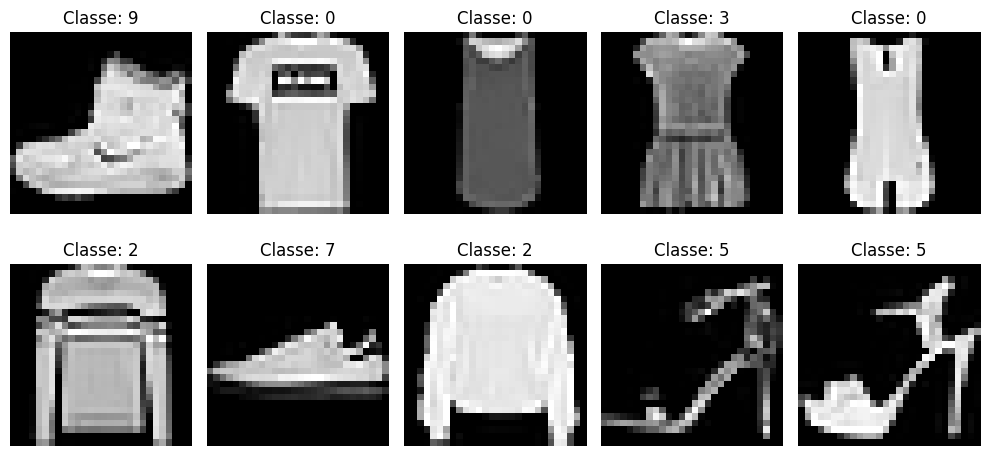

In [6]:
import matplotlib.pyplot as plt

# Afficher les 10 premières images avec leur numéro de classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(trainX_28x28[i], cmap='gray')  # Utiliser trainX_28x28 si en 28x28
    plt.title(f"Classe: {trainy_subset[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### 1000 images

* On considérant chaque image comme un vecteur de taille 784, représenter en nuage de points les différentes classes dans le syteme d'axe :
    * Les 2 premieres composantes issues de l'analyse en composante principales (ACP)

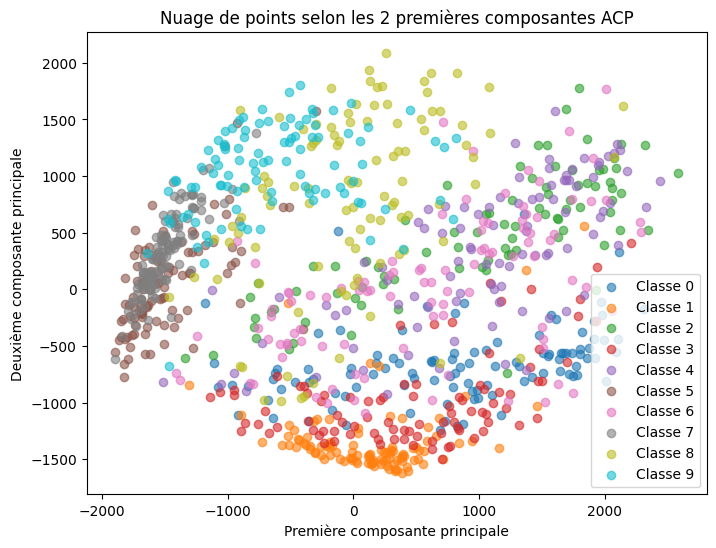

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduire les dimensions des images aplaties à 2D
pca = PCA(n_components=2)
trainX_pca = pca.fit_transform(trainX_flattened)

# Visualiser les classes dans un nuage de points
plt.figure(figsize=(8, 6))
for label in np.unique(trainy_subset):
    plt.scatter(
        trainX_pca[trainy_subset == label, 0],  # Première composante
        trainX_pca[trainy_subset == label, 1],  # Deuxième composante
        label=f'Classe {label}', alpha=0.6
    )
plt.title('Nuage de points selon les 2 premières composantes ACP')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend()
plt.show()


    * Les 2 premiers axes donnés par l'analyse linéaire discriminante (ALD)


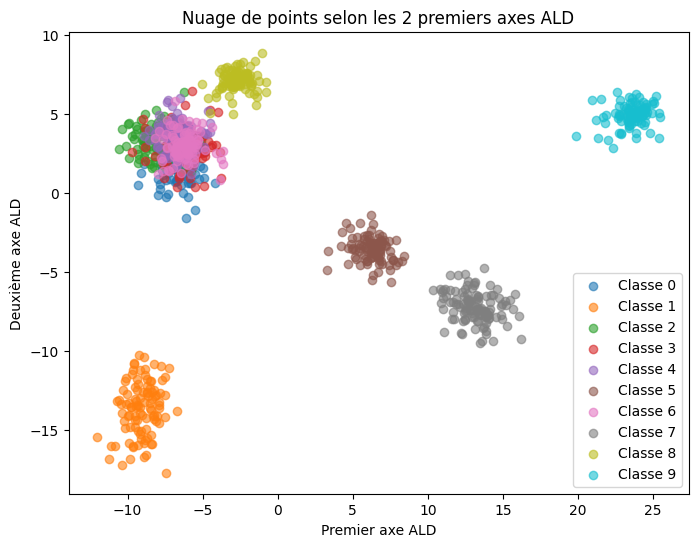

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Réduire les dimensions des images aplaties à 2D avec ALD
lda = LDA(n_components=2)
trainX_lda = lda.fit_transform(trainX_flattened, trainy_subset)

# Visualiser les classes dans un nuage de points
plt.figure(figsize=(8, 6))
for label in np.unique(trainy_subset):
    plt.scatter(
        trainX_lda[trainy_subset == label, 0],  # Première composante ALD
        trainX_lda[trainy_subset == label, 1],  # Deuxième composante ALD
        label=f'Classe {label}', alpha=0.6
    )
plt.title('Nuage de points selon les 2 premiers axes ALD')
plt.xlabel('Premier axe ALD')
plt.ylabel('Deuxième axe ALD')
plt.legend()
plt.show()


* Représenter en diagramme de paire (dit "pairplot") le nuage de points suivant les 3 axes:
    * Les 3 premieres composantes de l'ACP.

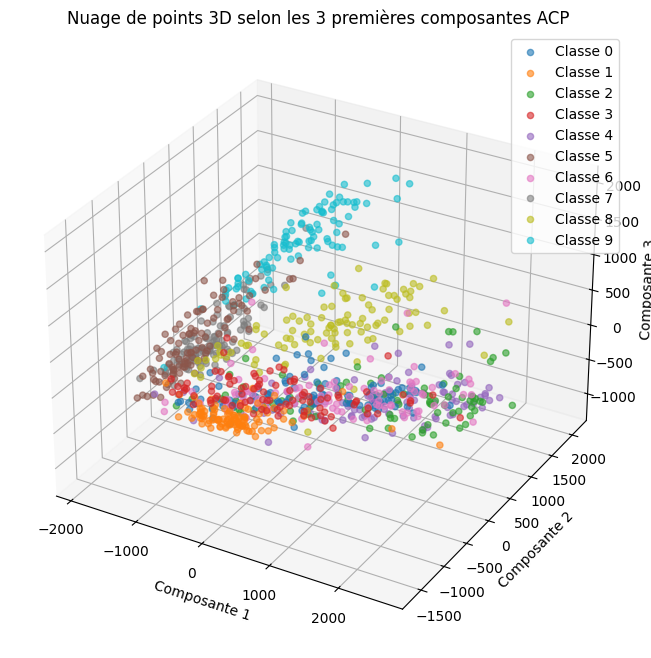

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Réduire les dimensions avec l'ACP à 3 composantes
pca_3d = PCA(n_components=3)
trainX_pca_3d = pca_3d.fit_transform(trainX_flattened)

# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(trainy_subset):
    ax.scatter(
        trainX_pca_3d[trainy_subset == label, 0],  # Première composante
        trainX_pca_3d[trainy_subset == label, 1],  # Deuxième composante
        trainX_pca_3d[trainy_subset == label, 2],  # Troisième composante
        label=f'Classe {label}', alpha=0.6
    )

ax.set_title('Nuage de points 3D selon les 3 premières composantes ACP')
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')
ax.legend()
plt.show()


    * Les 3 premiers axes de l'ALD.

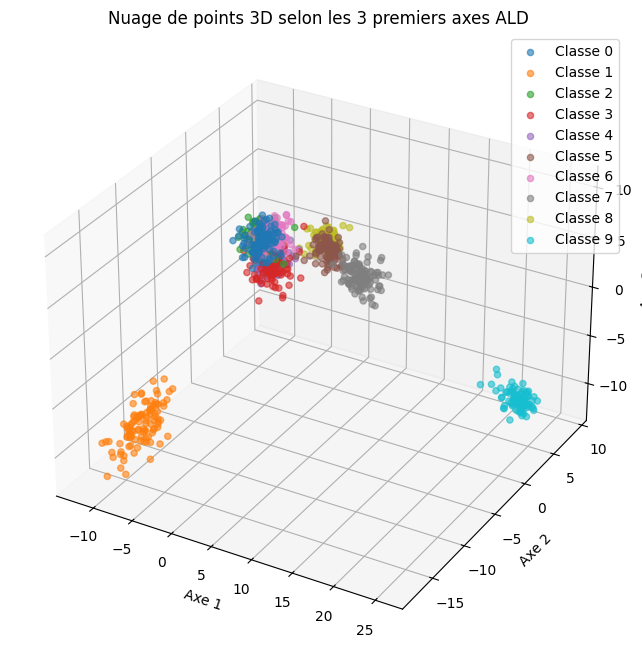

In [13]:
# Réduire les dimensions avec l'ALD à 3 axes
lda_3d = LDA(n_components=3)
trainX_lda_3d = lda_3d.fit_transform(trainX_flattened, trainy_subset)

# Visualisation 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(trainy_subset):
    ax.scatter(
        trainX_lda_3d[trainy_subset == label, 0],  # Premier axe
        trainX_lda_3d[trainy_subset == label, 1],  # Deuxième axe
        trainX_lda_3d[trainy_subset == label, 2],  # Troisième axe
        label=f'Classe {label}', alpha=0.6
    )

ax.set_title('Nuage de points 3D selon les 3 premiers axes ALD')
ax.set_xlabel('Axe 1')
ax.set_ylabel('Axe 2')
ax.set_zlabel('Axe 3')
ax.legend()
plt.show()


### Totalité

* On considérant chaque image comme un vecteur de taille 784, représenter en nuage de points les différentes classes dans le syteme d'axe :
    * Les 2 premieres composantes issues de l'analyse en composante principales (ACP)

In [ ]:
# Aplatir toutes les images (60,000 échantillons, 784 caractéristiques) et normaliser
trainX_flattened = trainX.reshape(trainX.shape[0], -1) / 255.0

# Réduire les dimensions à 2 composantes avec l'ACP
pca_2d = PCA(n_components=2)
trainX_pca_2d = pca_2d.fit_transform(trainX_flattened)

# Tracer les 2 premières composantes de l'ACP
plt.figure(figsize=(12, 10))
for label in np.unique(trainy):
    plt.scatter(
        trainX_pca_2d[trainy == label, 0],  # Première composante
        trainX_pca_2d[trainy == label, 1],  # Deuxième composante
        label=f'Classe {label}', alpha=0.5
    )
plt.title('Nuage de points selon les 2 premières composantes ACP (Ensemble complet)')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='Classe')
plt.show()


    * Les 2 premiers axes donnés par l'analyse linéaire discriminante (ALD)


In [ ]:
# Réduire les dimensions à 2 axes avec l'ALD
lda_2d = LDA(n_components=2)
trainX_lda_2d = lda_2d.fit_transform(trainX_flattened, trainy)

# Tracer les 2 premiers axes de l'ALD
plt.figure(figsize=(10, 8))
for label in np.unique(trainy):
    plt.scatter(
        trainX_lda_2d[trainy == label, 0],  # Premier axe
        trainX_lda_2d[trainy == label, 1],  # Deuxième axe
        label=f'Classe {label}', alpha=0.6
    )
plt.title('Nuage de points selon les 2 premiers axes ALD')
plt.xlabel('Premier axe ALD')
plt.ylabel('Deuxième axe ALD')
plt.legend()
plt.show()

* Représenter en diagramme de paire (dit "pairplot") le nuage de points suivant les 3 axes:
    * Les 3 premieres composantes de l'ACP.

In [ ]:
import plotly.express as px

# Réduire les dimensions avec l'ACP à 3 composantes
pca_3d = PCA(n_components=3)
trainX_pca_3d = pca_3d.fit_transform(trainX_flattened)

# Créer un DataFrame pour la visualisation
pca_df = pd.DataFrame(trainX_pca_3d, columns=['Composante 1', 'Composante 2', 'Composante 3'])
pca_df['Classe'] = trainy

# Visualisation interactive 3D
fig = px.scatter_3d(
    pca_df, x='Composante 1', y='Composante 2', z='Composante 3',
    color=pca_df['Classe'].astype(str),
    title='Nuage de points 3D selon les 3 premières composantes ACP',
    labels={'color': 'Classe'}
)
fig.show()

    * Les 3 premiers axes de l'ALD.

In [ ]:
# Réduire les dimensions avec l'ALD à 3 axes
lda_3d = LDA(n_components=3)
trainX_lda_3d = lda_3d.fit_transform(trainX_flattened, trainy)

# Créer un DataFrame pour la visualisation
lda_df = pd.DataFrame(trainX_lda_3d, columns=['Axe 1', 'Axe 2', 'Axe 3'])
lda_df['Classe'] = trainy

# Visualisation interactive 3D
fig = px.scatter_3d(
    lda_df, x='Axe 1', y='Axe 2', z='Axe 3',
    color=lda_df['Classe'].astype(str),
    title='Nuage de points 3D selon les 3 premiers axes ALD',
    labels={'color': 'Classe'}
)
fig.show()

## Partie 2 - Classification par Réseau Dense

* Proposer une modèle avec 2 couches cachées (éviter le sur-apprentissage !)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Préparer les données (aplatir les images et normaliser les pixels)
trainX_flattened = trainX.reshape(trainX.shape[0], -1) / 255.0
testX_flattened = testX.reshape(testX.shape[0], -1) / 255.0

# Convertir les labels en one-hot encoding
trainy_onehot = to_categorical(trainy, num_classes=10)
testy_onehot = to_categorical(testy, num_classes=10)

# Diviser les données d'entraînement pour la validation
X_train, X_val, y_train, y_val = train_test_split(
    trainX_flattened, trainy_onehot, test_size=0.2, random_state=42
)

# Construire le modèle dense avec Dropout pour éviter le sur-apprentissage
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.3),  # Ajoute un Dropout de 30%
    Dense(32, activation='relu'),
    Dropout(0.3),  # Ajoute un autre Dropout de 30%
    Dense(10, activation='softmax')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ajouter EarlyStopping pour arrêter l'entraînement si la performance de validation ne s'améliore pas
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle avec EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)



/usr/local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6152 - loss: 1.0897 - val_accuracy: 0.8276 - val_loss: 0.4629
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8070 - loss: 0.5620 - val_accuracy: 0.8499 - val_loss: 0.4169
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8236 - loss: 0.4971 - val_accuracy: 0.8507 - val_loss: 0.4144
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8353 - loss: 0.4734 - val_accuracy: 0.8582 - val_loss: 0.3881
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8351 - loss: 0.4575 - val_accuracy: 0.8568 - val_loss: 0.3867
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8446 - loss: 0.4439 - val_accuracy: 0.8682 - val_loss: 0.3694
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8473 - loss: 0.4289 - val_accuracy: 0.8671 - val_loss: 0.3682
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8500 - loss: 0.4229 - 

* Tracer les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.


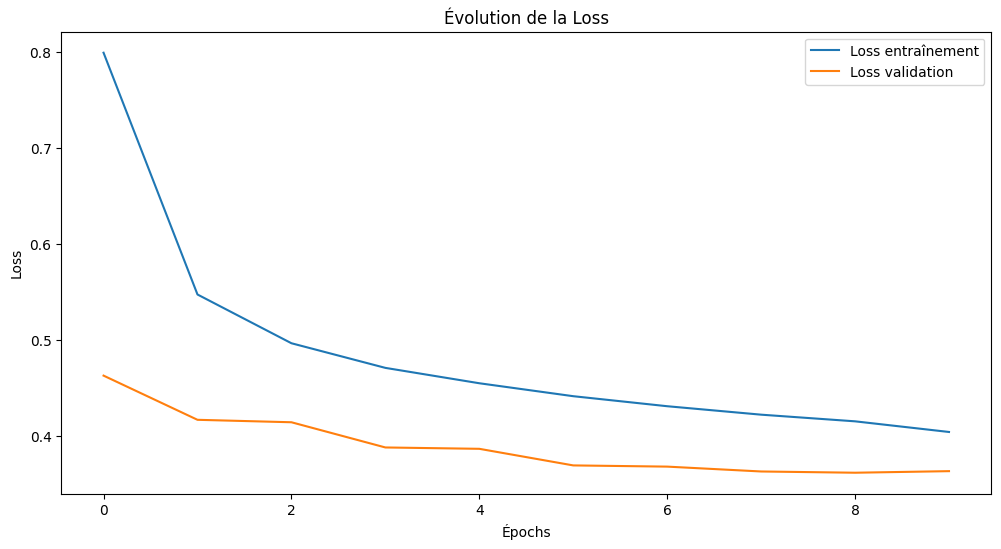

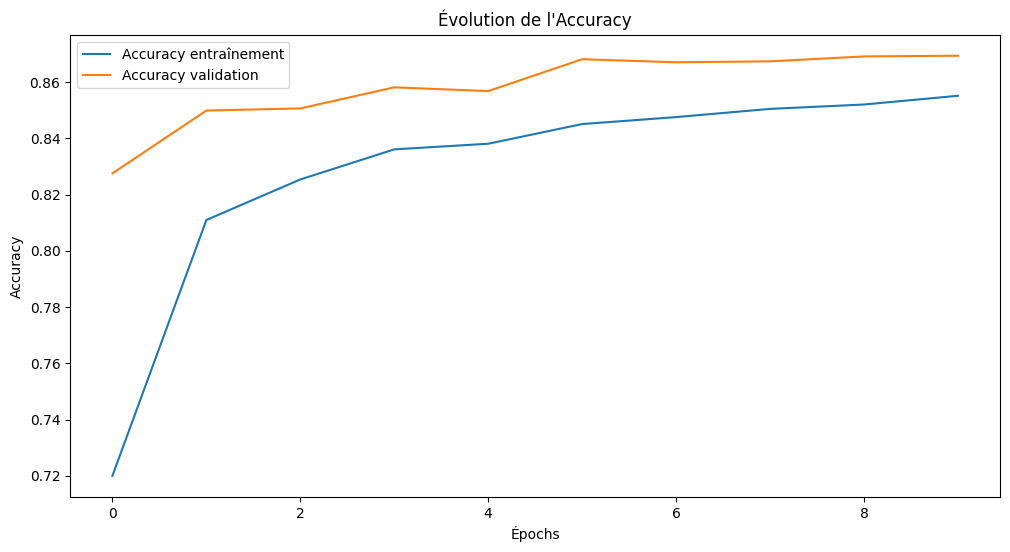

In [20]:
import matplotlib.pyplot as plt

# Tracer la courbe de la Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Évolution de la Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer la courbe de l'Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* Afficher ou tracer la matrice de confusion obtenue.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


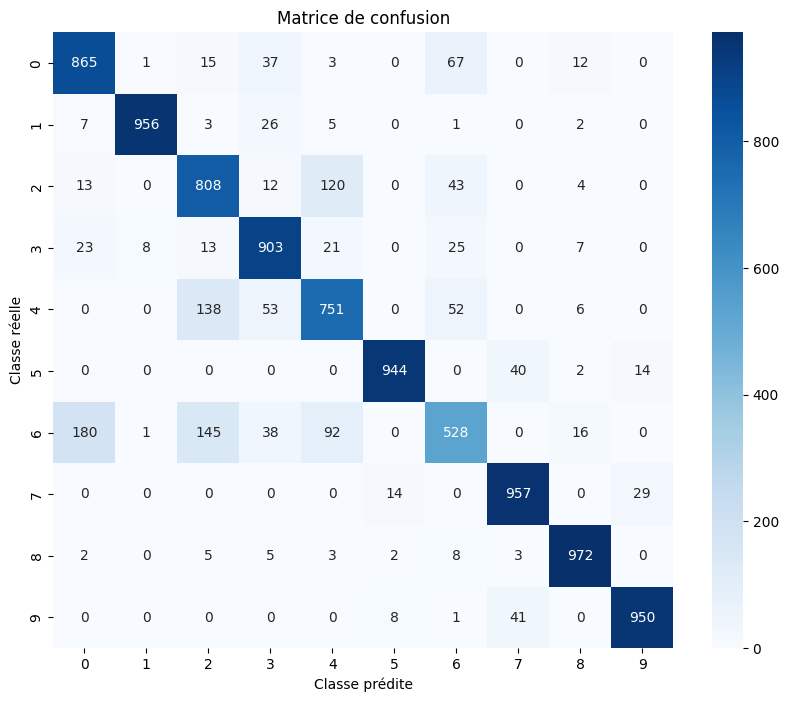

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Prédire les classes pour le test set
y_pred = np.argmax(model.predict(testX_flattened), axis=1)
y_true = np.argmax(testy_onehot, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()



* Représenter tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre.

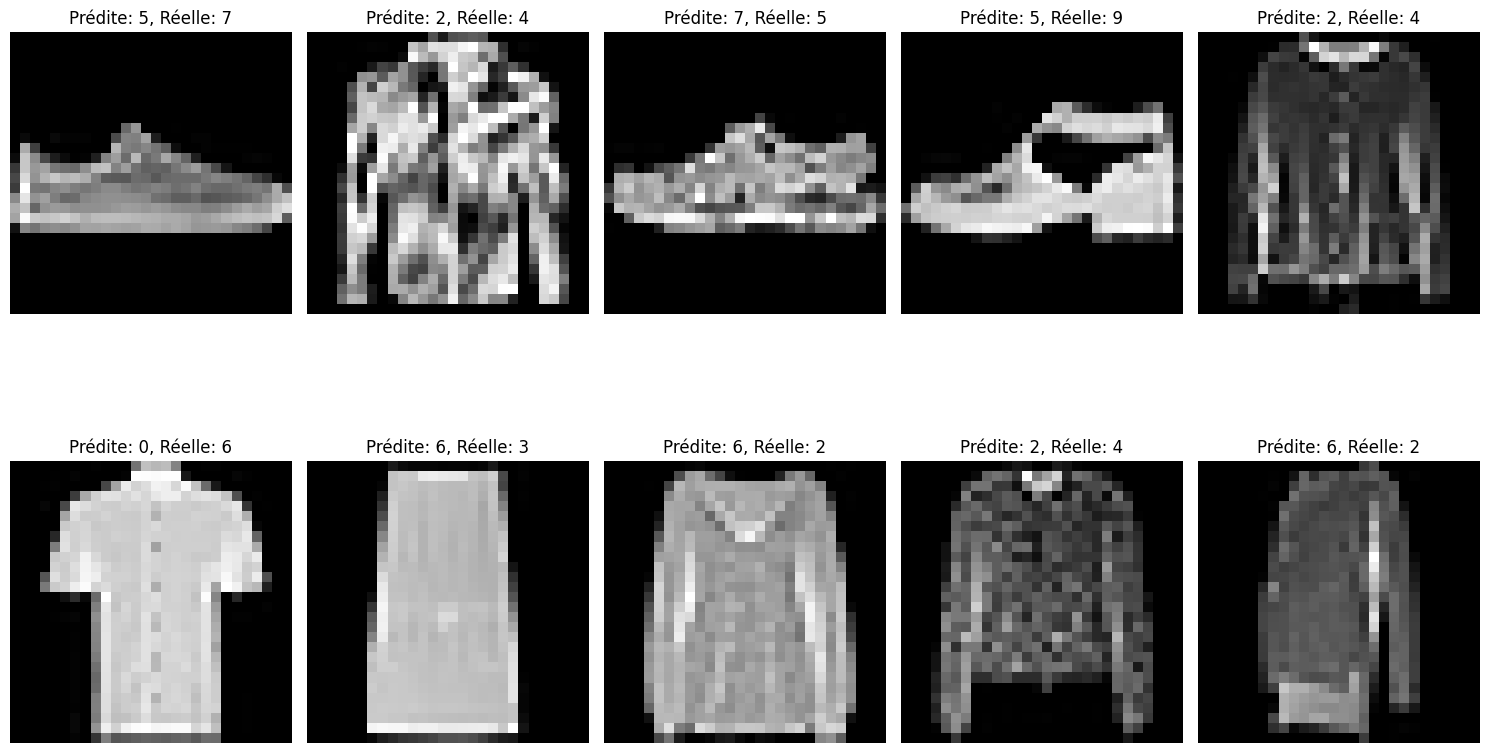

In [22]:
# Trouver les indices des mauvaises prédictions
incorrect = np.where(y_pred != y_true)[0]

# Afficher jusqu'à 10 exemples de mauvaises prédictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(testX[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Prédite: {y_pred[idx]}, Réelle: {y_true[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Partie 3 - Classification par réseau neuronal convolutif (CNN)
* Proposer une modèle dit réseau neuronal convolutif (toujours éviter le sur-apprentissage !)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Reshaper les images pour correspondre aux exigences du CNN (28x28x1)
trainX_reshaped = trainX.reshape(trainX.shape[0], 28, 28, 1) / 255.0
testX_reshaped = testX.reshape(testX.shape[0], 28, 28, 1) / 255.0

# Convertir les labels en one-hot encoding
trainy_onehot = to_categorical(trainy, num_classes=10)
testy_onehot = to_categorical(testy, num_classes=10)

# Diviser les données d'entraînement pour la validation
X_train, X_val, y_train, y_val = train_test_split(
    trainX_reshaped, trainy_onehot, test_size=0.2, random_state=42
)

# Construire le modèle CNN inspiré de LeNet-5
model = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.5),  # Garder Dropout à 0.5 pour la régularisation
    Dense(10, activation='softmax')
])


# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Ajouter EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    epochs=10, batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6402 - loss: 1.0242 - val_accuracy: 0.8271 - val_loss: 0.4675
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7975 - loss: 0.5500 - val_accuracy: 0.8513 - val_loss: 0.4033
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8236 - loss: 0.4775 - val_accuracy: 0.8617 - val_loss: 0.3696
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8370 - loss: 0.4443 - val_accuracy: 0.8675 - val_loss: 0.3542
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8466 - loss: 0.4175 - val_accuracy: 0.8705 - val_loss: 0.3400
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8526 - loss: 0.3997 - val_accuracy: 0.8749 - val_loss: 0.3313
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8579 - loss: 0.3883 - val_accuracy: 0.8767 - val_loss: 0.3264
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8641 -

* Tracer les courbes d'évolution de la fonction Loss ainsi que de l'accuracy du modèle lors des itérations.


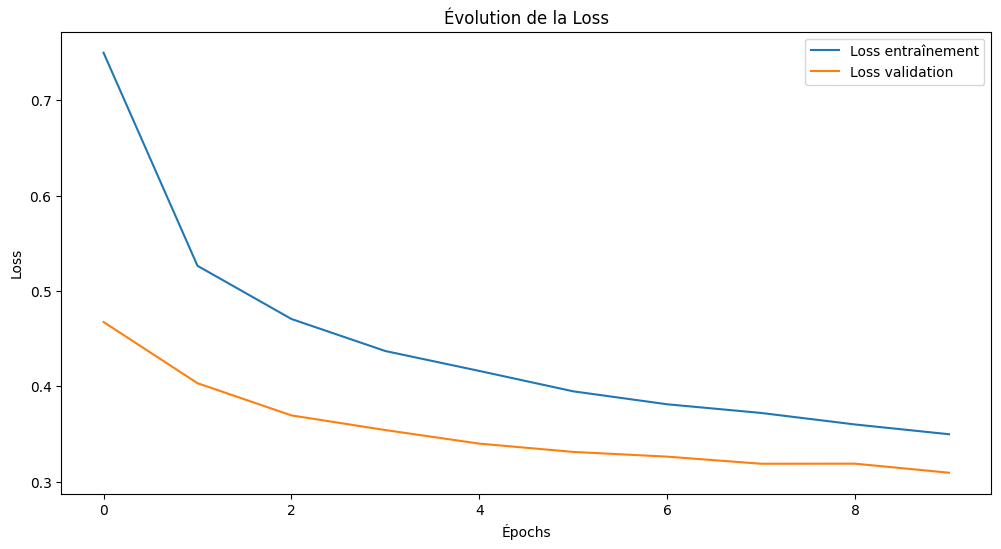

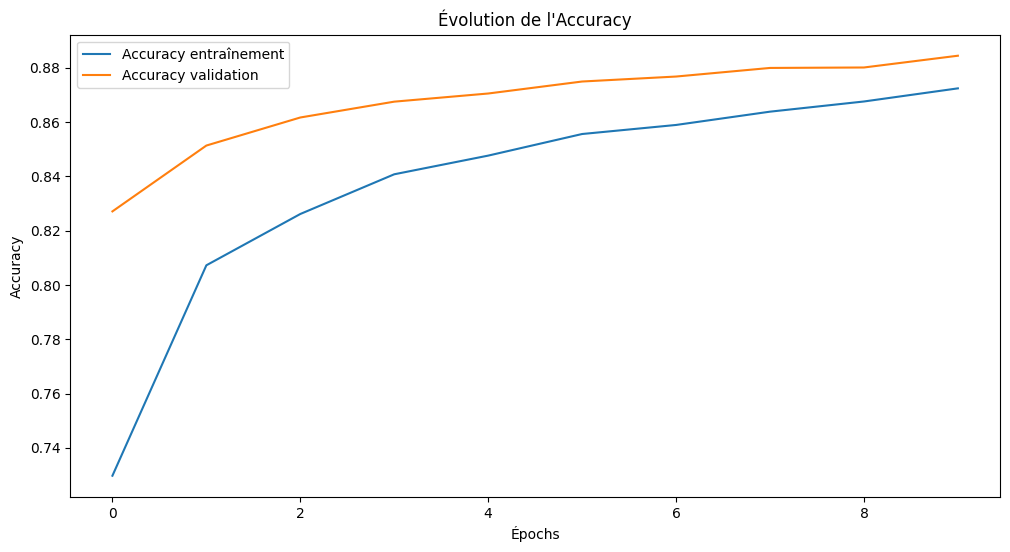

In [30]:
import matplotlib.pyplot as plt

# Tracer la courbe de la Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Loss entraînement')
plt.plot(history.history['val_loss'], label='Loss validation')
plt.title('Évolution de la Loss')
plt.xlabel('Épochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Tracer la courbe de l'Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Accuracy entraînement')
plt.plot(history.history['val_accuracy'], label='Accuracy validation')
plt.title('Évolution de l\'Accuracy')
plt.xlabel('Épochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* Afficher ou tracer la matrice de confusion obtenue.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


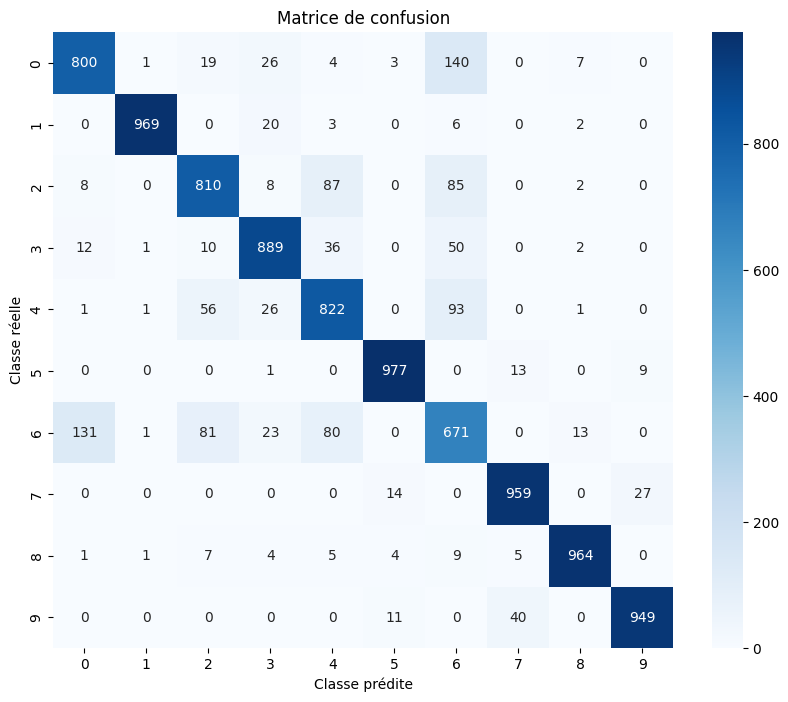

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Prédire les classes pour le test set
y_pred = np.argmax(model.predict(testX_reshaped), axis=1)
y_true = np.argmax(testy_onehot, axis=1)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Matrice de confusion')
plt.xlabel('Classe prédite')
plt.ylabel('Classe réelle')
plt.show()


* Représenter tout (ou partie si >10) des cas de mauvaise prédiction, avec classe prédite et classe exacte en titre.

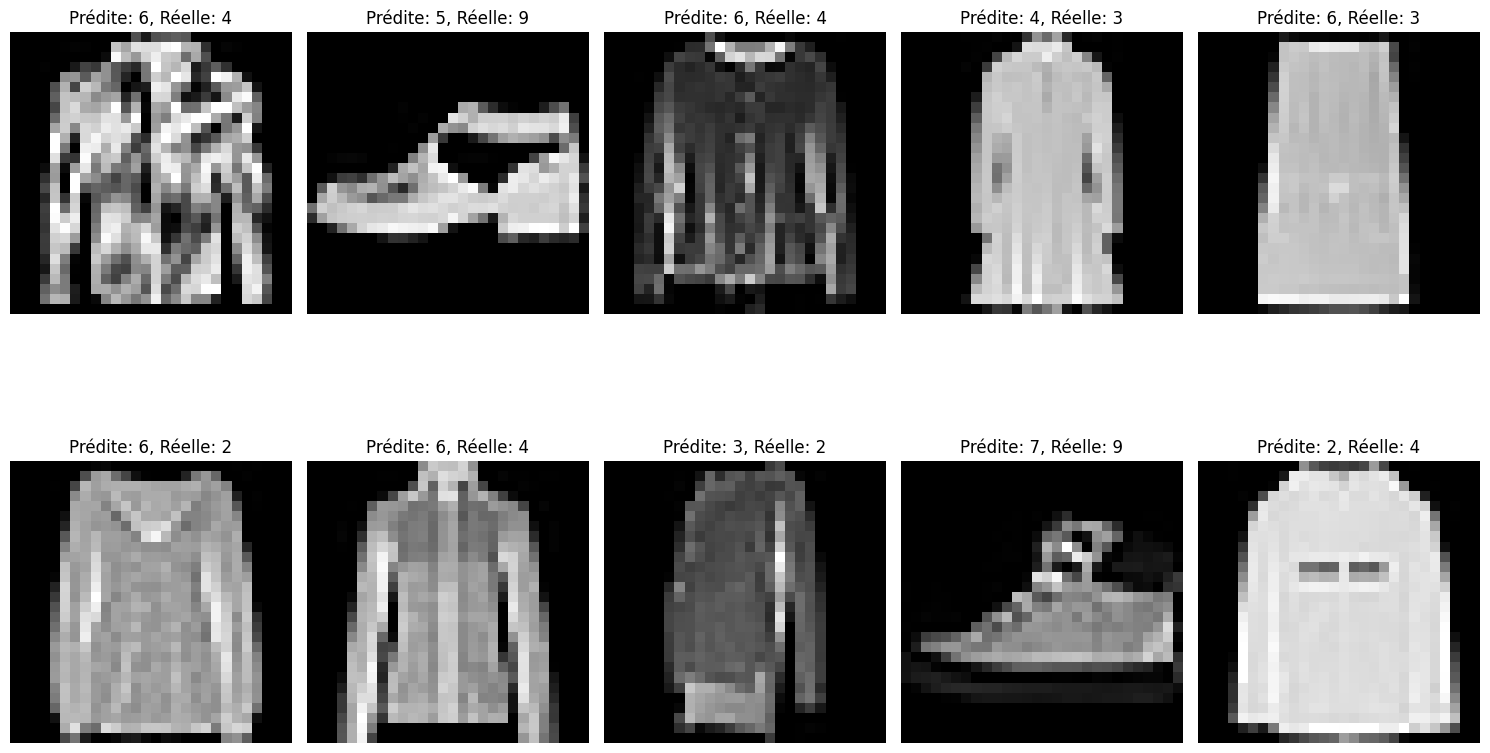

In [32]:
# Trouver les indices des mauvaises prédictions
incorrect = np.where(y_pred != y_true)[0]

# Afficher jusqu'à 10 exemples de mauvaises prédictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(testX[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Prédite: {y_pred[idx]}, Réelle: {y_true[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Analyse et Conclusion

## 1. Analyse des données (Partie 1)

Dans la première partie, j'ai exploré les images du dataset `fashion_mnist` pour comprendre la distribution des classes et voir comment les images se comportent dans un espace de dimension réduite.

- **Distribution des classes** : Le dataset est bien équilibré, avec à peu près le même nombre d'images pour chaque catégorie.
  
- **Analyse en composantes principales (ACP)** : J'ai réduit les dimensions des images à 2 et 3 composantes principales pour voir la répartition des données. Même si l'ACP ne prend pas en compte les étiquettes de classe, on peut observer que certaines classes sont déjà un peu séparées.

- **Analyse linéaire discriminante (ALD)** : L'ALD, contrairement à l'ACP, est supervisée, donc elle utilise les étiquettes de classe pour maximiser la séparation. Dans les visualisations 2D et 3D, on voit une meilleure séparation des classes avec l'ALD. Cela indique que les images de chaque classe sont assez distinctes et que la tâche de classification est faisable avec un bon modèle.

Ces observations montrent que les classes sont visuellement différentes les unes des autres, ce qui est encourageant pour un modèle de classification.

---

## 2. Classification par réseau dense (Partie 2)

Dans cette partie, j'ai utilisé un réseau de neurones dense pour essayer de classer les images.

- **Performances** : Le modèle dense a réussi à obtenir une bonne accuracy d'entraînement, mais il a montré des signes de sur-apprentissage, car l'accuracy de validation était moins bonne. Cela signifie que le modèle s'est trop adapté aux données d'entraînement et a du mal à généraliser sur des données nouvelles.

- **Régularisation** : Pour contrer le sur-apprentissage, j'ai ajouté des techniques de régularisation comme le dropout et l'early stopping.

- **Conclusion** : Un réseau dense a du mal à capturer les motifs visuels complexes présents dans des images comme celles de `fashion_mnist`. Bien qu'il puisse fonctionner pour des images simples, il n'exploite pas assez bien les informations spatiales, comme les textures et les formes.

---

## 3. Classification par réseau convolutif (Partie 3)

Dans cette partie, j'ai testé un modèle de réseau de neurones convolutif (CNN) inspiré de LeNet-5. Ce type de réseau est bien plus adapté aux données d'image.

- **Performances** : Le CNN a montré de bien meilleures performances, car il est conçu pour traiter les images en capturant les motifs visuels. L'accuracy du modèle était plus élevée, et le sur-apprentissage était moins prononcé que pour le réseau dense.

- **Régularisation et Data Augmentation** : Pour renforcer la généralisation, j'ai appliqué des techniques comme le dropout, l'early stopping et la data augmentation. La data augmentation a pris du temps mais a été bénéfique pour améliorer la performance sur des données nouvelles en augmentant la diversité des images d'entraînement.

- **Conclusion** : Les CNN sont beaucoup plus efficaces que les réseaux denses pour les images. Grâce aux couches de convolution et de pooling, le modèle peut repérer des motifs de texture, de forme, et de structure dans les images, ce qui permet une meilleure séparation des classes.

---

## 4. Conclusion générale

Pour conclure, voici ce que j'ai appris en analysant les résultats de chaque modèle :

- **Les CNN sont plus adaptés aux données d'image** : Les réseaux de neurones convolutifs surpassent largement les réseaux denses pour ce type de tâche, car ils capturent mieux les motifs visuels dans les images.

- **Importance de la régularisation** : Le sur-apprentissage est un problème récurrent pour les modèles de deep learning, en particulier avec des architectures complexes. Les techniques de régularisation comme le dropout, l'early stopping et la régularisation L2 sont indispensables pour améliorer la généralisation.

- **Data Augmentation** : La data augmentation est un excellent moyen d'augmenter la diversité du dataset, ce qui est crucial pour éviter le sur-apprentissage. Bien qu'elle augmente le temps d'entraînement, elle a montré de très bons résultats en termes de performance.

- **Utilité de l’ACP et de l’ALD** : Les analyses en composantes principales (ACP) et linéaire discriminante (ALD) sont utiles pour explorer la structure des données avant d'entraîner un modèle. Elles montrent si les classes sont séparables dans un espace de dimension réduite, ce qui donne une idée de la difficulté de la tâche de classification.

En résumé, pour une classification d'images, un modèle CNN avec des techniques de régularisation et de data augmentation fournit des résultats bien plus robustes.
